In [1]:
import pandas as pd
import seaborn as sns

### Portfolio assignment 3
15 min: Perform a univariate analysis on all the categorical data of the penguins dataset. Commit the notebook to your portfolio when you're finished.
Optional: Start working on portfolio assignment 4 

In [2]:
penguins = sns.load_dataset("penguins")

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<AxesSubplot:>

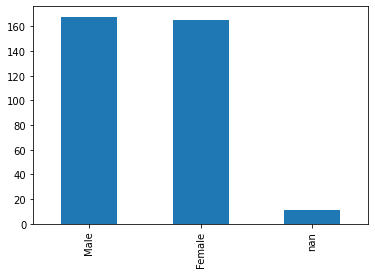

In [3]:
penguins['sex'].value_counts(dropna=False).plot(kind='bar')

### Portfolio assignment 4
15 min: Look online for a datset that you personally find interesting to explore. It can be about any topic that you find interesting: sports, games, software development, etc. Commit the dataset to your portfolio. You will be analysing the dataset in future portfolio assignments.

Required characteristics of the dataset:
- Must be in a tabular format: Contains rows and columns
- Contains at least 100 rows
- Contains at least 2 columns with categorical data and at least 2 columns with numerical data
- Is less than 200 MB

![](https://i.imgur.com/0v1CGNV.png)

### Portfolio assignment 5
20 min: 
- Download lifeExpectancyAtBirth.csv from Onderwijsmateriaal/Datasets on Blackboard.
- Move the file to the same folder as the Notebook that you will be working in.
- Load the dataset in your Notebook with the following code: lifeExpectancy = pd.read_csv('Datasets/lifeExpectancyAtBirth.csv', sep=',')
- Look at the dataset with the .head() function.
- Filter the dataframe: We only want the life expectancy data about 2019 and 'Both sexes'
- Use this dataframe to perform a univariate analysis on the life expectancy in 2019.

Commit the notebook and dataset to your portfolio when you're finished.

![](https://i.imgur.com/0v1CGNV.png)

In [4]:
lifeExpectancy = pd.read_csv('Datasets/lifeExpectancyAtBirth.csv', sep=',')

lifeExpectancy.head()


,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,Life expectancy at birth (years),Both sexes,63.21
1,Afghanistan,2019,Life expectancy at birth (years),Male,63.29
2,Afghanistan,2019,Life expectancy at birth (years),Female,63.16
3,Afghanistan,2015,Life expectancy at birth (years),Both sexes,61.65
4,Afghanistan,2015,Life expectancy at birth (years),Male,61.04


In [5]:
filteredLifeExpectancy = lifeExpectancy[(lifeExpectancy['Dim1'] == 'Both sexes') & (lifeExpectancy['Period'] == 2019)]
filteredLifeExpectancy.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,Life expectancy at birth (years),Both sexes,63.21
12,Albania,2019,Life expectancy at birth (years),Both sexes,78.00
24,Algeria,2019,Life expectancy at birth (years),Both sexes,77.13
36,Angola,2019,Life expectancy at birth (years),Both sexes,63.06
48,Antigua and Barbuda,2019,Life expectancy at birth (years),Both sexes,76.45


<AxesSubplot:>

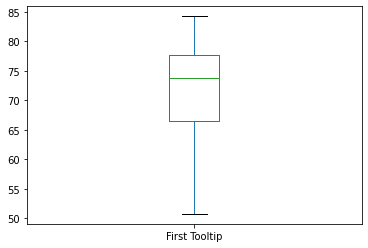

In [6]:
filteredLifeExpectancy['First Tooltip'].plot(kind='box')

<AxesSubplot:ylabel='Frequency'>

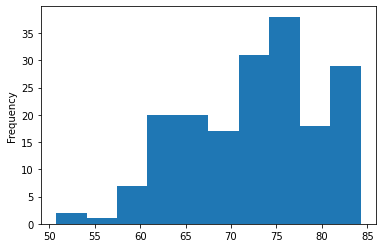

In [7]:
filteredLifeExpectancy['First Tooltip'].plot(kind='hist', bins=10)

### Portfolio assignment 6
60 min: Perform a univariate analysis on at least 2 columns with categorical data and on at least 2 columns with numerical data in the dataset that you chose in portfolio assignment 4. Commit the Notebook to your portfolio when you're finished.

![](https://i.imgur.com/0v1CGNV.png)

In [8]:
lolChampions = pd.read_csv('Datasets/LoL-Champions.csv', sep=',')

lolChampions.head()

,Id,Name,Class,Style,Difficulty,DamageType,Damage,Sturdiness,Crowd-Control,Mobility,Functionality
0,1,Aatrox,Warrior,3,2,P,3,3,2,2,2.0
1,2,Ahri,Mage,10,2,M,3,1,2,3,1.0
2,3,Akali,Assasin,7,2,PM,3,1,1,3,1.0
3,4,Alistar,Tank-Support,7,1,M,1,3,3,1,2.0
4,5,Amumu,Tank,9,1,M,2,3,3,1,1.0


In [9]:
filteredClass = lolChampions[lolChampions['Class'] == 'Warrior']

filteredClass.head()

,Id,Name,Class,Style,Difficulty,DamageType,Damage,Sturdiness,Crowd-Control,Mobility,Functionality
0,1,Aatrox,Warrior,3,2,P,3,3,2,2,2.0
15,16,Camille,Warrior,4,3,P,3,2,2,3,1.0
28,29,Fiora,Warrior,2,3,P,3,2,2,2,2.0
31,32,Gangplank,Warrior,8,3,P,3,2,2,2,2.0
33,34,Gnar,Warrior,5,3,P,2,3,2,2,1.0


<AxesSubplot:>

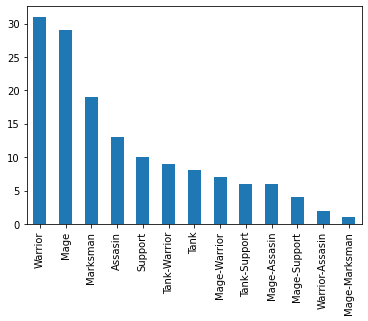

In [10]:
#penguins['sex'].value_counts(dropna=False).plot(kind='bar')

lolChampions['Class'].value_counts(dropna=False).plot(kind='bar')

<AxesSubplot:>

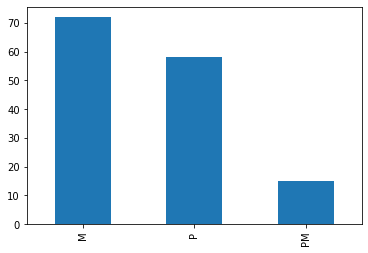

In [11]:
lolChampions['DamageType'].value_counts(dropna=False).plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

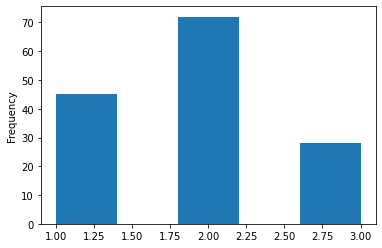

In [12]:
lolChampions['Difficulty'].plot(kind='hist', bins=5)